+---+----------+------+-----+------+
|age|department|emp_id| name|salary|
+---+----------+------+-----+------+
| 28|        HR|     1| Ravi| 55000|
| 32|   Finance|     2| Sita| 65000|
| 26|        IT|     3|Arjun| 70000|
| 30| Marketing|     4| Neha| 60000|
| 29|        IT|     5|Kiran| 72000|
+---+----------+------+-----+------+

+----------+------+---------------+-----+
|project_id|emp_id|   project_name| cost|
+----------+------+---------------+-----+
|       201|     1|    Recruitment|30000|
|       202|     2|Budget Analysis|40000|
|       203|     3|App Development|50000|
|       204|     4|    Ad Campaign|45000|
|       205|     5|Cloud Migration|60000|
|       206|     3| Cyber Security|35000|
|       207|     1|  Policy Update|20000|
+----------+------+---------------+-----+

First 5 rows of dataset:
   emp_id   name  age department  salary
0       1   Ravi   28         HR   55000
1       2   Sita   32    Finance   65000
2       3  Arjun   26         IT   70000
3       4   Ne

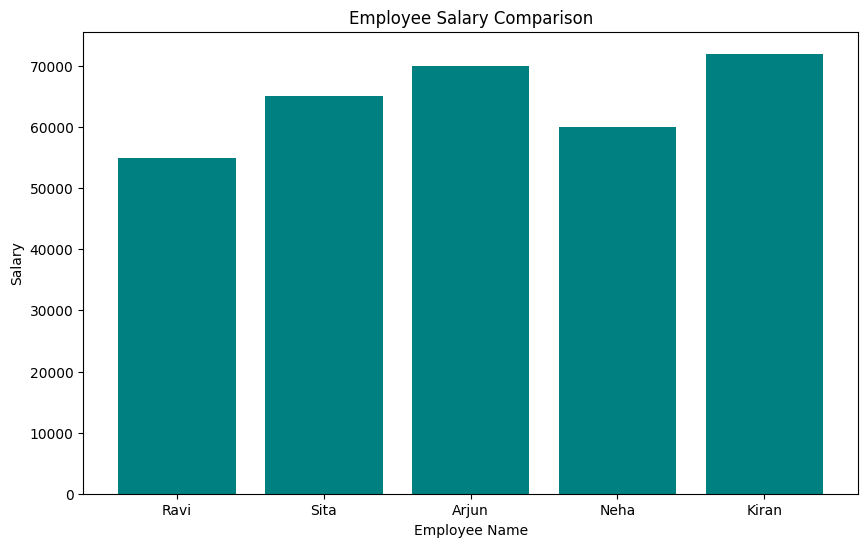

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, max, min, sum

# Create Spark session
spark = SparkSession.builder.appName("DataFrame-Exercises-2").getOrCreate()

# Employee Data
employee_data = [
  {"emp_id": 1, "name": "Ravi", "age": 28, "department": "HR", "salary": 55000},
  {"emp_id": 2, "name": "Sita", "age": 32, "department": "Finance", "salary": 65000},
  {"emp_id": 3, "name": "Arjun", "age": 26, "department": "IT", "salary": 70000},
  {"emp_id": 4, "name": "Neha", "age": 30, "department": "Marketing", "salary": 60000},
  {"emp_id": 5, "name": "Kiran", "age": 29, "department": "IT", "salary": 72000},
]
employee_df = spark.createDataFrame(employee_data)
employee_df.show()

# Project Data
project_data = [
    (201, 1, "Recruitment", 30000),
    (202, 2, "Budget Analysis", 40000),
    (203, 3, "App Development", 50000),
    (204, 4, "Ad Campaign", 45000),
    (205, 5, "Cloud Migration", 60000),
    (206, 3, "Cyber Security", 35000),
    (207, 1, "Policy Update", 20000)
]
project_cols = ["project_id", "emp_id", "project_name", "cost"]
project_df = spark.createDataFrame(project_data, project_cols)
project_df.show()

# Pandas DataFrame for quick view
df = pd.DataFrame(employee_data)
print("First 5 rows of dataset:")
print(df.head())

# Select specific columns
employee_df.select("name", "department").show()

# Filter employees with salary > 60000
employee_df.filter(col("salary") > 60000).show()

# Group by department and calculate avg salary
employee_df.groupBy("department").agg(avg("salary")).show()

# Distinct ages
employee_df.select("age").distinct().show()
project_df.select("emp_id").distinct().show()

# Max and Min cost from project table
project_df.agg(max("cost"), min("cost")).show()

# Group by emp_id for total project cost
project_df.groupBy("emp_id").agg(sum("cost").alias("total_cost")).show()

# Inner join employee & project
employee_df.join(project_df, "emp_id", "inner").show()

# Left join employee & project
employee_df.join(project_df, "emp_id", "left").show()

# Register Temp Views
employee_df.createOrReplaceTempView("employee")
project_df.createOrReplaceTempView("project")

# SQL – Total cost by department
spark.sql("""
    SELECT e.department, SUM(p.cost) as total_spent
    FROM employee e
    JOIN project p ON e.emp_id = p.emp_id
    GROUP BY e.department
""").show()

# SQL – Top employees by project cost
spark.sql("""
    SELECT e.name, SUM(p.cost) as total_spent
    FROM employee e
    JOIN project p ON e.emp_id = p.emp_id
    GROUP BY e.name
    ORDER BY total_spent DESC
    LIMIT 5
""").show()

# Visualization
plt.figure(figsize=(10,6))
plt.bar(df["name"], df["salary"], color="teal")
plt.title("Employee Salary Comparison")
plt.xlabel("Employee Name")
plt.ylabel("Salary")
plt.show()
